In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [170]:
tsl=pd.read_csv(r"C:\Users\SID13\Downloads\TSLA.csv")

In [171]:
tsl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,223.089996,225.679993,222.250000,222.410004,222.410004,2297500
1,2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2,2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
3,2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
4,2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400


In [172]:
x=tsl.iloc[:,2:3]
x.head()


,High
0,225.679993
1,223.250000
2,216.500000
3,214.199997
4,214.779999


In [173]:
sc=MinMaxScaler(feature_range=(0,1))
x=sc.fit_transform(x)
x[:5]

array([[0.25222941],
       [0.24356139],
       [0.21948348],
       [0.21127915],
       [0.21334807]])

In [174]:
len(x)

1259

In [175]:
x_train=[]
y_train=[]
for i in range(25, 1000):
    x_train.append(x[i-25:i,0])
    y_train.append(x[i, 0])

In [176]:
# x_test=[]
# y_test=[]
# for i in range(1000, 1259):
#     x_test.append(x[i-25:i,0])
#     y_test.append(x[i, 0])

In [177]:
x_train=np.array(x_train)
y_train=np.array(y_train)
# x_test=np.array(x_test)
# y_test=np.array(y_test)

In [178]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [179]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [180]:
model.compile(optimizer = 'adam',
              loss= 'mean_squared_error')

In [181]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128)

Train on 975 samples
Epoch 1/10
975/975 [==============================] - 13s 13ms/sample - loss: 0.1045
Epoch 2/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0282
Epoch 3/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0200
Epoch 4/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0159
Epoch 5/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0120
Epoch 6/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0110
Epoch 7/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0098
Epoch 8/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0097
Epoch 9/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0093
Epoch 10/10
975/975 [==============================] - 2s 2ms/sample - loss: 0.0087


In [182]:

predictions = model.predict(x_train)

In [183]:
predictions[:5]

array([[0.19419359],
       [0.1946178 ],
       [0.1959831 ],
       [0.19831954],
       [0.20123601]], dtype=float32)

In [184]:
y_train[:5]

array([0.24409643, 0.22458441, 0.23375187, 0.21320541, 0.1716487 ])

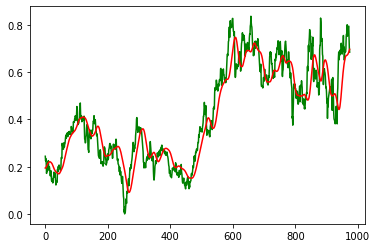

In [185]:
plt.plot(range(len(x_train)),y_train,c='g')
plt.plot(range(len(x_train)),predictions,c='r')